In [1]:
import logging
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [3]:
logging.basicConfig(level=logging.DEBUG, filename="log1.log", filemode='w', format="%(asctime)s - %(levelname)s - function: %(funcName)s - line: %(lineno)d - %(message)s")
logger = logging.getLogger(__name__)

In [4]:
X,y = load_digits(return_X_y=True)

#scaling all values into range [0;1]
X_scaled= minmax_scale(X.data, feature_range=(0, 1))
ind = np.random.choice(X_scaled.shape[0], 30, replace=False)
X_train = X_scaled[ind]


In [5]:
kde0 = KernelDensity(kernel='tophat', bandwidth=0.1).fit(X_train)
kde1 = KernelDensity(kernel='tophat', bandwidth=1).fit(X_train)
kde2 = KernelDensity(kernel='tophat', bandwidth=10).fit(X_train)

In [6]:
samples0 = kde0.sample(n_samples=11)
samples1 = kde1.sample(n_samples=11)
samples2 = kde2.sample(n_samples=11)

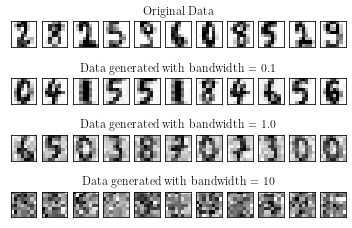

In [7]:
ind = np.random.choice(X_scaled.shape[0], 11, replace=False)
E = X_scaled[ind]
fig, axs = plt.subplots(4, 11,subplot_kw=dict(xticks=[], yticks=[]))
for j in range(np.shape(axs)[1]):
    axs[0][j].imshow(E[j].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
for j in range(np.shape(axs)[1]):
    axs[1][j].imshow(samples0[j].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
for j in range(np.shape(axs)[1]):
    axs[2][j].imshow(samples1[j].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
for j in range(np.shape(axs)[1]):
    axs[3][j].imshow(samples2[j].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
axs[0,5].set_title("Original Data")
axs[1,5].set_title("Data generated with bandwidth = 0.1")
axs[2,5].set_title("Data generated with bandwidth = 1.0")
axs[3,5].set_title("Data generated with bandwidth = 10")

plt.savefig("./Thesis/img/exercise1g.eps",format='eps', bbox_inches='tight')
plt.show()

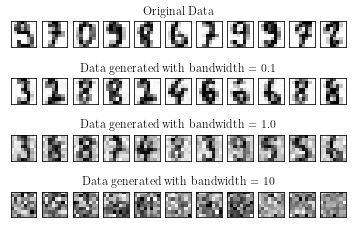

In [8]:
kde0 = KernelDensity(kernel='tophat', bandwidth=0.1).fit(X_train)
kde1 = KernelDensity(kernel='tophat', bandwidth=1).fit(X_train)
kde2 = KernelDensity(kernel='tophat', bandwidth=10).fit(X_train)
samples0 = kde0.sample(n_samples=11)
samples1 = kde1.sample(n_samples=11)
samples2 = kde2.sample(n_samples=11)
ind = np.random.choice(X_scaled.shape[0], 11, replace=False)
E = X_scaled[ind]
fig, axs = plt.subplots(4, 11,subplot_kw=dict(xticks=[], yticks=[]))
for j in range(np.shape(axs)[1]):
    axs[0][j].imshow(E[j].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
for j in range(np.shape(axs)[1]):
    axs[1][j].imshow(samples0[j].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
for j in range(np.shape(axs)[1]):
    axs[2][j].imshow(samples1[j].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
for j in range(np.shape(axs)[1]):
    axs[3][j].imshow(samples2[j].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
axs[0,5].set_title("Original Data")
axs[1,5].set_title("Data generated with bandwidth = 0.1")
axs[2,5].set_title("Data generated with bandwidth = 1.0")
axs[3,5].set_title("Data generated with bandwidth = 10")
plt.savefig("./Thesis/img/exercise1t.eps",format='eps', bbox_inches='tight')
plt.show()

In [9]:
def log_reg(x_train, x_test, y_train, y_test):
    scaler= StandardScaler()
    train_scaled = scaler.fit_transform(x_train)
    test_scaled = scaler.fit_transform(x_test)
    
    logisticRegression= LogisticRegression()
    logisticRegression.fit(train_scaled, y_train)

    predictions = logisticRegression.predict(test_scaled)
    score = logisticRegression.score(test_scaled, y_test)
    return score

In [10]:
def knn_score(x_train, x_test, y_train, y_test):
    acc = []
    for k in range(1,2):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(x_train, y_train)
        score = model.score(x_test, y_test)
        acc.append(score)
    return np.amax(acc)

In [11]:
def bayes_score(x_train, x_test, y_train, y_test):
    clf = GaussianNB()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    return accuracy_score(y_test, y_pred)

In [12]:
def generate_data(h, k, x_train, y_train, kernel):
    y_train_expanded = np.expand_dims(y_train, axis=1)
    xy_train = np.concatenate((x_train,y_train_expanded),axis=1)
    for i in range(10):
        kde = KernelDensity(kernel=kernel, bandwidth=h).fit(xy_train[np.where(xy_train[:,-1] == i)][:,:-1])
        new_data = kde.sample(k)
        class_labels = np.ones(k)
        class_labels = class_labels * i
        x_train = np.concatenate([x_train, new_data], axis=0)
        y_train = np.concatenate([y_train, class_labels], axis=0)
    return x_train, y_train

In [13]:
def experiment(h, k, x_train, x_test, y_train, y_test, kernel):
    x_train_h_k, y_train_h_k = generate_data(h, k, x_train, y_train, kernel)

    alpha_h_k = log_reg(x_train_h_k, x_test, y_train_h_k, y_test)
    alpha_zero = log_reg(x_train, x_test, y_train, y_test)
    return [alpha_h_k, alpha_zero]

In [14]:
def knn_exp(h, k, x_train, x_test, y_train, y_test, kernel):
    x_train_h_k, y_train_h_k = generate_data(h, k, x_train, y_train, kernel)
    
    alpha_h_k = knn_score(x_train_h_k, x_test, y_train_h_k, y_test)
    alpha_zero = knn_score(x_train, x_test, y_train, y_test)
    return [alpha_h_k, alpha_zero]

In [15]:
def results(num_iter,min_bandwidth, max_bandwidth, kernel, filename):
    bandwidths = np.linspace(min_bandwidth, max_bandwidth, num_iter)
    alpha_zero = np.ones((num_iter, 30))
    alpha_h_k = np.ones((num_iter, 30))
    #taking the average of 30 experiments
    for j in range(30):
        x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=30, shuffle=True, stratify=y)
        for i in range(num_iter):
            erg = experiment(bandwidths[i], 10, x_train, x_test, y_train, y_test,kernel)
            alpha_zero[i,j] = erg[1]
            alpha_h_k[i,j] = erg[0]
    avg_zero = np.average(alpha_zero, axis = 1)
    avg_h_k = np.average(alpha_h_k, axis = 1)
    
    plt.plot(bandwidths, avg_zero, label="default train set")
    plt.plot(bandwidths, avg_h_k, label="augmented train set")

    plt.xlabel("bandwidth")
    plt.ylabel("accuracy")
    plt.legend()
    plt.savefig(filename, format='eps', bbox_inches='tight')
    plt.show()

[0.78202226 0.78202226 0.78202226 0.78202226 0.78202226 0.78202226
 0.78202226 0.78202226 0.78202226 0.78202226 0.78202226 0.78202226
 0.78202226 0.78202226 0.78202226 0.78202226 0.78202226 0.78202226
 0.78202226 0.78202226 0.78202226 0.78202226 0.78202226 0.78202226
 0.78202226 0.78202226 0.78202226 0.78202226 0.78202226 0.78202226]


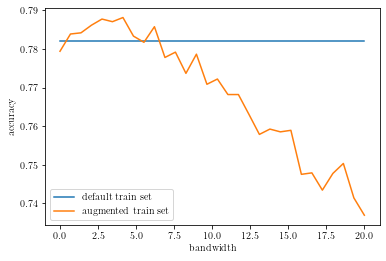

In [16]:
results(30, 0.01, 20, 'gaussian', "./Thesis/img/exercise2g.eps")

[0.77777778 0.77777778 0.77777778 0.77777778 0.77777778 0.77777778
 0.77777778 0.77777778 0.77777778 0.77777778 0.77777778 0.77777778
 0.77777778 0.77777778 0.77777778 0.77777778 0.77777778 0.77777778
 0.77777778 0.77777778 0.77777778 0.77777778 0.77777778 0.77777778
 0.77777778 0.77777778 0.77777778 0.77777778 0.77777778 0.77777778]


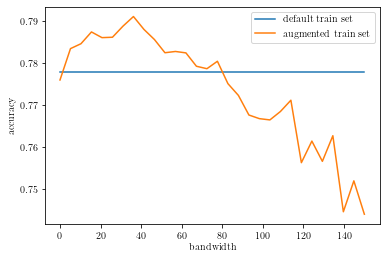

In [17]:
results(30,0.01,150,'tophat',"./Thesis/img/exercise2t.eps")

In [18]:
def knn_results(num_iter,min_bandwidth, max_bandwidth, kernel):
    #the same as results2, just using 1-nn
    alpha_zero = np.ones((num_iter, 30))
    alpha_h_k = np.ones((num_iter, 30))
    fig, axs = plt.subplots(1,2, sharey=True)
    for k,ax in enumerate(axs):
        bandwidths = np.linspace(min_bandwidth, max_bandwidth[k], num_iter)
        #taking the average of 30 experiments
        for j in range(30):
            x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=30, shuffle=True, stratify=y)
            for i in range(num_iter):
                erg = knn_exp(bandwidths[i], 10, x_train, x_test, y_train, y_test,kernel[k])
                alpha_zero[i,j] = erg[1]
                alpha_h_k[i,j] = erg[0]
        avg_zero = np.average(alpha_zero, axis = 1)
        avg_h_k = np.average(alpha_h_k, axis = 1)
        ax.plot(bandwidths, avg_zero,label='default train set')
        ax.plot(bandwidths, avg_h_k,label='augmented train set')
        
        ax.set_xlabel("bandwidth")
        ax.set_ylabel("accuracy")
        ax.legend()
    plt.ylim(0.77,0.84)
    plt.savefig("./Thesis/img/exercise3gtknn.eps",format='eps', bbox_inches='tight')
    plt.show()

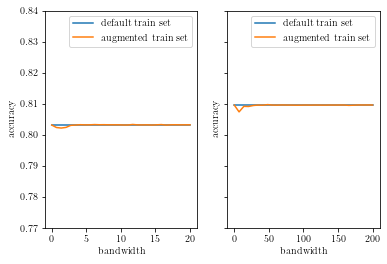

In [19]:
knn_results(30,0.01,[20,200],['gaussian','tophat'])

In [20]:
def bay_exp(h, k, x_train, x_test, y_train, y_test, kernel):
    x_train_h_k, y_train_h_k = generate_data(h, k, x_train, y_train, kernel)
    
    alpha_h_k = bayes_score(x_train_h_k, x_test, y_train_h_k, y_test)
    alpha_zero = bayes_score(x_train, x_test, y_train, y_test)
    return [alpha_h_k, alpha_zero]

In [21]:
def bayes_results(num_iter,min_bandwidth, max_bandwidth, kernel, filename):
    #the same as results2, just using the gaussian naive bayes classifier instead of logistic regression
    alpha_zero = np.ones((num_iter, 30))
    alpha_h_k = np.ones((num_iter, 30))
    fig, axs = plt.subplots(1,2, sharey=True)
    gs = fig.add_gridspec(2, wspace=0)
    for k, ax in enumerate(axs):
        bandwidths = np.linspace(min_bandwidth, max_bandwidth[k], num_iter)
        #taking the average of 30 experiments
        for j in range(30):
            x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=30, shuffle=True, stratify=y)
            for i in range(num_iter):
                erg = bay_exp(bandwidths[i], 10, x_train, x_test, y_train, y_test,kernel[k])
                alpha_zero[i,j] = erg[1]
                alpha_h_k[i,j] = erg[0]
        avg_zero = np.average(alpha_zero, axis = 1)
        avg_h_k = np.average(alpha_h_k, axis = 1)
        print("alpha zero:", np.amax(avg_zero))
        print("max alpha h k:",np.amax(avg_h_k))
        print("difference: ", np.amax(avg_h_k) - np.amax(avg_zero))
        ax.plot(bandwidths, avg_zero, label='default train set')
        ax.plot(bandwidths, avg_h_k, label='augmented train set')
        
        ax.set_xlabel("bandwidth")
        ax.set_ylabel("accuracy")
        ax.legend()
    plt.savefig(filename,format='eps', bbox_inches='tight')
    plt.show()

alpha zero: 0.5394642520279194
max alpha h k: 0.7565742312771173
difference:  0.21710997924919795
alpha zero: 0.5246745897000565
max alpha h k: 0.7596679871722318
difference:  0.2349933974721753


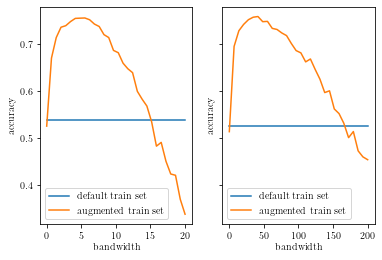

In [22]:
bayes_results(30,0.01,[20,200],['gaussian','tophat'],"./Thesis/img/exercise3gt.eps")

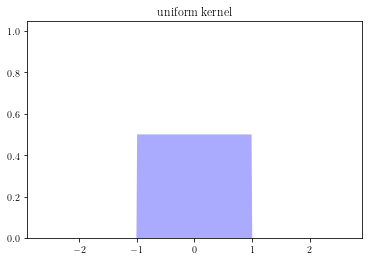

In [23]:
#plot kernels
kernel = 'tophat'
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
plt.fill(X_plot[:, 0], np.exp(log_dens), "-k", fc="#AAAAFF")
ax = plt.gca()
plt.ylim(0, 1.05)
plt.xlim(-2.9, 2.9)
plt.title('uniform kernel')
plt.show()

In [24]:
def results2(num_iter,min_bandwidth, max_bandwidth, kernel, filename):
    #the same as results, just plotting both kernels next to each other
    alpha_zero = np.ones((num_iter, 30))
    alpha_h_k = np.ones((num_iter, 30))
    fig, axs = plt.subplots(1,2, sharey=True)
    #taking the average of 30 experiments
    for k, ax in enumerate(axs):
        bandwidths = np.linspace(min_bandwidth, max_bandwidth[k], num_iter)
        for j in range(30):
            x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=30, shuffle=True, stratify=y)
            for i in range(num_iter):
                erg = experiment(bandwidths[i], 10, x_train, x_test, y_train, y_test,kernel[k])
                alpha_zero[i,j] = erg[1]
                alpha_h_k[i,j] = erg[0]
        avg_zero = np.average(alpha_zero, axis = 1)
        avg_h_k = np.average(alpha_h_k, axis = 1)
        print("alpha zero:", np.amax(avg_zero))
        print("max alpha h k:",np.amax(avg_h_k))
        print("difference: ", np.amax(avg_h_k) - np.amax(avg_zero))
        ax.plot(bandwidths, avg_zero, label="default train set")
        ax.plot(bandwidths, avg_h_k, label="augmented train set")

        ax.set_xlabel("bandwidth")
        ax.set_ylabel("accuracy")
        ax.legend()
    plt.savefig(filename, format='eps', bbox_inches='tight')
    plt.show()

alpha zero: 0.7840030182984343
max alpha h k: 0.7958309752876815
difference:  0.011827956989247213
alpha zero: 0.7862478777589134
max alpha h k: 0.7963591775136767
difference:  0.010111299754763325


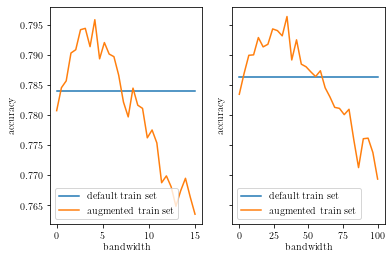

In [27]:
results2(30, 0.01, [15,100], ['gaussian','tophat'], "./Thesis/img/exercise2gt.eps")